# 위성영상(Sentinel-2)과 Machine Learning 기술을 활용한 저수지 녹조모니터링

                                                           - K-water연구원 AI연구센터 최영돈 책임, 정지영 책임, 김성훈 센터장

## 1. 추진배경 및 목적

- 매년 저수지에 발생하는 녹조는 시기별 기상조건이나 수체 흐름에 따라 발생농도나 지역이 달라질 수 있으며, 이를 고려한 녹조관리를 위해서는 광역적인 녹조 발생특성 분석이 필요함

- 최근 K-water에서는 위성영상을 활용한 녹조발생 모니턱링 기술을 개발하여 적용 중에 있으며,

- 금번 연구에서는 Sentinel-2 위성과 Machine Learning기술을 활용하여 저수지 등 수체의 광역적 녹조 발생특성에 대한 모니터링 방법론을 제시하고자 함

## 2. 주요 내용

- 영주댐은 내성천 상류에 위치한 다목적댐으로 2016년 12월 조성되어 '19년 하반기부터 댐안정성 검사를 위하여 담수를 시작함

- 담수이후 여름철 공간적인 녹조발생 분포를 모니터링하기 위해 2020년 물환경연구소에서는 "선박부착형 센서를 이용해 녹조(Green Algae, Bluegreen, Diatoms와 Cryptophyta)를 측정하였으며 이를 활용하여 Sentinel-2 위성의 분광특성값과 Traning을 함으로써 향후 Sentinel-2 위성영상을 활용, 광역적 녹조발생 특성을 모니터링하고자 함


- 선박부착형 센서를 활용한 모니터링 공간적 범위 및 정점조사 지점도
  - 면단위조사: 영주댐저수지, 유사조절지
  - 정점  조사: 영주댐 호내 5개, 유사조절지 2개 지점

<img src="../data/유역이미지.png" width="500">

- Sentinel-2 위성특성 및 분광특성
  - 면단위조사: 영주댐저수지, 유사조절지
  - 정점  조사: 영주댐 호내 5개, 유사조절지 2개 지점

<tr>
<td> <img src="../data/sentinel.jpeg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../data/band.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>

## 3. 데이터 수집

- (선박측정) '20년 2~9월까지 조류강별 Chl-a 모니터링 자료 확보
  - 측정장비: 수중형 연속조류측정기 (FluoroProbe)
  

  - 구름 등 날씨를 고려하여 활용가능성 일자 선정 (기상값은 영주지점 일평균 자료 활용)
| 관측일 | 운량, 1/10 | 기온 (섭씨) |
| :- | -: | :-: |
| '20.02.19 | 6.6| 1.0
| '20.08.20 | 2.1 | 26.0
| '20.08.25 | 4.1 | 26.7
| '20.09.14 | 5.6 | 19.4


- (Sentinel-2) 선박측정시 위경도값으로 위성과 밴드값 매칭
| 관측일 | '20.02.19 | '20.08.20 | '20.08.25 | '20.09.14 | 합계 |
| :- | -: |  -: | -: | -: |:-: |
| 자료수 | 2,600| 2,634 | 2,057 | 14 | 7,291

## 4. 분석절차

1. Import **pyalgae_ai** Python 라이브러리
2. 입력자료를 Pandas로 불러와서 입력자료(Sentinel-2)와 Label자료(Algae Observation Data)를 구분하기
3. 분석할 **열 (Sentinel의 밴드, 온도, 운량 조합)**의 조합을 선택
4. algae_monitor 함수를 이용, Machine Learning 실행
5. Maching Learning 결과값 확인
6. 결과값에 대한 Performance Test 수행
7. 필요시 모델 튜닝
8. 결과 Graph 생성
9. Training을 통해 개발된 모델을 Pickle(pkl) 파일로 저장 및 재분석 시행

### 4-1 Import Python Libraries

- 본 pyalgae_ai python 라이브러리는 Sentinel-2 위성과 관측녹조자료의 Machine Learning 분석을 위해 K-water AI연구센터에서 개발

In [1]:
import pyalgae_ai as AI
import matplotlib.pyplot as plt
import numpy as np

### 4.2 Import Sentinel-2 and Algae Observation Data

#### Sentinel-2 자료와 Algae 관측자료가 정리된 CSV 파일 지정 (Directory가 다를 경우, Directory도 포함필요)

<img src="../data/입력포맷.png" width="800">

In [2]:
raw_obs = "../data/20220224_sentinels_and_algae_obs.csv"

#### Machine Learning 클래스를 활용하여 algae Object 생성

 - Machine Learning 클래스의 첫번째 파라미터는 CSV 파일을 지정, 
 
 - 두번째 파라미터는 G열(6번) ~ T열(20번)까지 input_sentinel(입력값), B열(1번) ~ F열(6번)까지 label_algae(라벨)로 지정

In [3]:
algae = AI.Machine_Learning(raw_obs, [1,6,20])
input_sentinel, label_algae = algae.preprocessing()

####  < 입력값 확인 >

In [4]:
input_sentinel

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,AT,CLOUD
0,0.0061,0.0131,0.0121,0.0080,0.0081,0.0056,0.0087,0.0058,0.0051,0.0069,0.0111,0.0094,1.0,6.6
1,0.0051,0.0180,0.0160,0.0112,0.0106,0.0087,0.0095,0.0098,0.0083,0.0052,0.0109,0.0080,1.0,6.6
2,0.0238,0.0125,0.0210,0.0205,0.0413,0.0443,0.0478,0.0242,0.0363,0.0333,0.0454,0.0479,1.0,6.6
3,0.0053,0.0137,0.0121,0.0092,0.0068,0.0065,0.0058,0.0077,0.0081,0.0059,0.0095,0.0073,1.0,6.6
4,0.0072,0.0181,0.0173,0.0117,0.0104,0.0065,0.0119,0.0104,0.0098,0.0080,0.0103,0.0110,1.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,0.0261,0.0293,0.0413,0.0247,0.0349,0.0262,0.0292,0.0240,0.0223,0.0167,0.0080,0.0035,26.7,4.1
7301,0.0270,0.0306,0.0458,0.0239,0.0502,0.0334,0.0366,0.0277,0.0254,0.0205,0.0093,0.0055,26.7,4.1
7302,0.0270,0.0289,0.0485,0.0259,0.0551,0.0355,0.0383,0.0272,0.0261,0.0205,0.0089,0.0060,26.7,4.1
7303,0.0304,0.0304,0.0364,0.0244,0.0365,0.0314,0.0345,0.0274,0.0291,0.0128,0.0131,0.0065,26.7,4.1


####  < 라벨값 확인 >

In [5]:
label_algae

,total_chla,Green_Algae,Bluegreen,Diatoms,Cryptophyta
0,0.00,0.0,0.00,0.00,0.00
1,0.27,0.0,0.27,0.00,0.00
2,0.64,0.0,0.00,0.64,0.00
3,0.75,0.0,0.75,0.00,0.00
4,0.77,0.0,0.04,0.00,0.72
...,...,...,...,...,...
7300,166.13,0.0,138.46,0.00,27.67
7301,168.90,0.0,138.33,0.00,30.57
7302,175.06,0.0,144.44,0.00,30.62
7303,191.14,0.0,146.90,0.00,44.23


### 4.3 입력값의 Sentinel-2의 밴드 및 기상자료의 조합 지정

- 입력값의 전체 Datasets "['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD']"이 가장 높은 상관관계를 보여줌

- 필요시 List의 형태로 아래와 같이 조합을 추가 가능 (아래의 예는 3개의 조합을 선택한 것임)

In [6]:
select_columns = [['B1 B2 B3'], ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD'], ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12']]

### 4.4 algae_monitor 함수를 이용, Machine Learning 실행

- input_sentinel, label_algae, select_columns은 앞에서 얻은 값을 입력

- model_list는 **"RF"** (Random Forest Regression Algorithm), **"GBR"** (Gradient Boosting Regression Algorithm), **"XGB"** XGBoosting Algorithm 중 선택가능, **본 예제에서는 Random Forest Regression Algorithm 선택**

- Traning Data의 크기는 전체데이터의 0.8로 지정, n_estimator=100로 지정(RF의 가지수 지정), random_state=42로 지정(난수발생 고정)

- 3개 조합의 Training시행시 약 40초가 소요됨 (1개 조합에 약 13~14초 소요)

In [8]:
%%time
results = AI.algae_monitor(input_sentinel, label_algae, select_columns, model_list=["RF"], trainSize_rate=0.8, n_estimators=200, random_state=42)

parameter : B1 B2 B3
parameter : B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD
parameter : B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12
Wall time: 1min 50s


### 4.5 Maching Learning 결과값 확인

- 결과값은 총 15개이며, **[5개의 목표값: 1) total_chla,	2) Green_Algae,	3) Bluegreen,	4) Diatoms,	5) Cryptophyta]** X **[3개의 입력조합 1) ['B1 B2 B3'], 2) ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD'], 3) ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12']** 의 갯수임


- results[0] : ['B1 B2 B3'] 입력조합의 "total_chla" 분석결과, results[1] : ['B1 B2 B3'] 입력조합의 "Green_Algae" 분석결과


- results[2] : ['B1 B2 B3'] 입력조합의 "Bluegreen" 분석결과, results[3] : ['B1 B2 B3'] 입력조합의 "Diatoms" 분석결과


- results[4] : ['B1 B2 B3'] 입력조합의 "Cryptophyta" 분석결과


- 그 다음부터 순서대로 results[5] : ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD'] 입력조합의 "total_chla" 분석결과 임


- 이와 같이 분석결과는 results[0] ~ results[14]까지 얻을 수 있음


- 그리고 results[Num]이후 각 결과값은 "model", "X_train", "Y_train", "X_test", "Y_test", "Y_train_predict", "Y_test_predict" 7개의 값으로 구성되어 있으며, 각각 results[Num]이후에 results[Num][0]~results[Num][6]으로 값을 얻을 수 있음

In [52]:
print(len(results), len(results[0]))

15 7


- ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD']의 model 확인

In [9]:
results[1][0]

RandomForestRegressor(random_state=42)

- ['B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD']의 "Y_test_predict" 확인

In [10]:
results[1][6]

array([ 2.37223417,  0.        ,  0.        , ..., 26.19936667,
       16.83399494, 26.19936667])

### 4.6 결과값에 대한 Performance Test 수행

- 본 Performance Test에서는 "R2", "MSE", "MAE", "RMSE", "NSE", "KGE"가 이용가능하며 performance_test 함수에 입력하면 됨

In [53]:
# 전체 결과 확인
for i in range(len(results)):
    score_train, score_test = AI.performance_test("NSE", results[i])
    f_result = '"{}" and "{}"의 결과: score_train={}, score_test={}'.format(' '.join(list(results[i][1])), results[i][2].name, score_train, score_test)
    print(f_result)

"B1 B2 B3" and "total_chla"의 결과: score_train=[0.94652304], score_test=[-0.19846385]
"B1 B2 B3" and "Green_Algae"의 결과: score_train=[0.98311322], score_test=[0.84297316]
"B1 B2 B3" and "Bluegreen"의 결과: score_train=[0.96880172], score_test=[0.6875657]
"B1 B2 B3" and "Diatoms"의 결과: score_train=[0.9761825], score_test=[0.87456998]
"B1 B2 B3" and "Cryptophyta"의 결과: score_train=[0.90289171], score_test=[0.293623]
"B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD" and "total_chla"의 결과: score_train=[0.97335108], score_test=[0.54433518]
"B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD" and "Green_Algae"의 결과: score_train=[0.99438414], score_test=[0.96677871]
"B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD" and "Bluegreen"의 결과: score_train=[0.98363935], score_test=[0.9142226]
"B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD" and "Diatoms"의 결과: score_train=[0.99183125], score_test=[0.97046547]
"B1 B2 B3 B4 B5 B6 B7 B8 B8A B9 B11 B12 AT CLOUD" and "Cryptophyta"의 결과: score_train=[0.94414087], score_t

In [56]:
# 가장 좋은 결과
score_train, score_test = AI.performance_test("NSE", results[6])
score_train, score_test

(array([0.99438414]), array([0.96677871]))

### 4.7 필요시 모델 튜닝

- 본 방법에서는 Grid Search CV 이용

In [12]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = [
    {'n_estimators':[50, 100, 200], 'max_features':[2, 4, 6, 8]},
    {'bootstrap': [False]}
]

In [18]:
grid_search = GridSearchCV(results[1][0], param_grid, cv=5, 
                           scoring='r2',
                          return_train_score=True)

In [21]:
%%time
grid_search.fit(results[1][1], results[1][2])

Wall time: 1min 47s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]},
                         {'bootstrap': [False]}],
             return_train_score=True, scoring='r2')

In [22]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

### 4.8 결과 Graph 생성

- Performance Test결과에 따라 세번째 파라미터를 "R2", "MSE", "MAE", "RMSE", "NSE", "KGE"와 같이 지정하여 그래프생성

In [55]:
Y_test = results[6][4]
Y_test_predict = results[6][6]

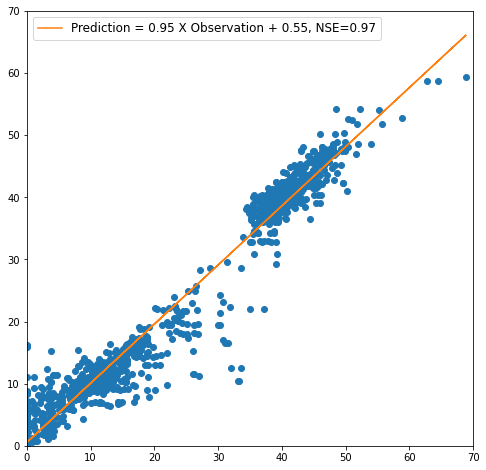

In [57]:
AI.plotting.linear_regression(Y_test, Y_test_predict, "NSE", score_test[0])

### 4.9 Training을 통해 개발된 모델을 Pickle(pkl) 파일로 저장 및 재분석 시행

- 향후 Training의 재실행없이 기존 개발된 모델을 불러와서 위성영상 BAND값을 활용한 저수지내 녹조현황 분석

In [58]:
import joblib
from hydroeval import evaluator, nse, kge

In [59]:
joblib.dump(results[6][0], "rf_model.pkl")

['rf_model.pkl']

In [60]:
rf_model_loaded = joblib.load("rf_model.pkl")

In [61]:
Y_test_predict_loaded = rf_model_loaded.predict(results[6][3])
Y_test_predict_loaded

array([2.05651999e+01, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 7.55000000e-03, 0.00000000e+00])

In [62]:
nse_score_test_loaded = evaluator(nse, results[1][4], Y_test_predict_loaded, axis=1)
nse_score_test_loaded[0]

0.9667787113921852

## 5. 향후 계획


  **5.1 영주댐 유역 Sentinel-2 자료 API를 활용한 취득코드 개발** 
  
  **5.2 Streamlit을 활용한 Web App 개발** 
  
  **5.3 타 댐 적용방안 마련**